# **Credit Card Fraud Detection**

## Problem Statement:
For many banks, retaining high profitable customers is the number one business goal. Banking fraud, however, poses a significant threat to this goal for different banks. In terms of substantial financial losses, trust and credibility, this is a concerning issue to both banks and customers alike.

In the banking industry, credit card fraud detection using machine learning is not only a trend but a necessity for them to put proactive monitoring and fraud prevention mechanisms in place. Machine learning is helping these institutions to reduce time-consuming manual reviews, costly chargebacks and fees as well as denials of legitimate transactions.

In this project we will detect fraudulent credit card transactions with the help of Machine learning models.
We will analyse customer-level data that has been collected and analysed during a research collaboration of Worldline and the Machine Learning Group.

## Data Understanding :

The data set includes credit card transactions made by European cardholders over a period of two days in September 2013. Out of a total of 2,84,807 transactions, 492 were fraudulent. This data set is highly unbalanced, with the positive class (frauds) accounting for 0.172% of the total transactions. The data set has also been modified with principal component analysis (PCA) to maintain confidentiality. Apart from ‘time’ and ‘amount’, all the other features (V1, V2, V3, up to V28) are the principal components obtained using PCA. The feature 'time' contains the seconds elapsed between the first transaction in the data set and the subsequent transactions. The feature 'amount' is the transaction amount. The feature 'class' represents class labelling, and it takes the value of 1 in cases of fraud and 0 in others.

## Table of Contents
1. [Importing dependencies](#p1)
2. [Exploratory data analysis](#p2)
3. [Over Sampling using SMOTE](#p3)
   * [Stratify Splitting for Training and Testing](#p3-1)
   * [Logistic Regression](#p3-2)
   * [Random Forest](#p3-3)
   * [K-Nearest Neighbour](#p3-4)
4. [Under Sampling](#p4)
   * [Stratify Splitting for Training and Testing](#p4-1)
   * [Logistic Regression](#p4-2)
   * [Random Forest](#p4-3)
   * [K-Nearest Neighbour](#p4-4)


# <a name="p1">**Importing Dependencies**</a>

In [ ]:
# Importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

# for over-sampling and under-sampling
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss

import warnings
warnings.filterwarnings("ignore")

# <a name="p2">**Exploratory data analysis**</a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
creditcard = pd.read_csv('/content/drive/MyDrive/creditcard.csv')
creditcard.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
creditcard.shape

(284807, 31)

In [ ]:
creditcard.isnull().values.any()

False

In [ ]:
creditcard.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,1.768627e-15,9.170318e-16,-1.810658e-15,1.693438e-15,1.479045e-15,3.482336e-15,1.392007e-15,-7.528491e-16,4.328772e-16,9.049732e-16,5.085503e-16,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


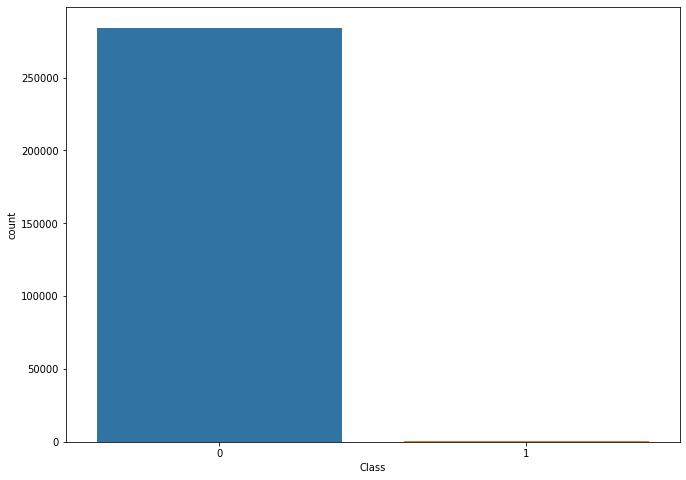

In [ ]:
plt.figure(figsize=(11,8))
sns.countplot(creditcard['Class'])

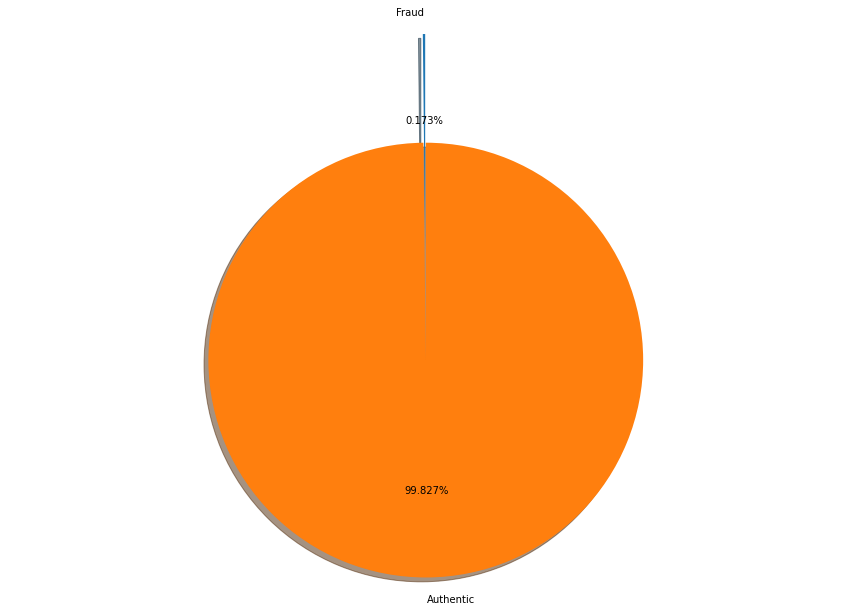

In [ ]:
labels = 'Fraud', 'Authentic'
sizes = [creditcard.Class[creditcard['Class']==1].count(),creditcard.Class[creditcard['Class']==0].count()]
explode = (0, 0.5)

fig1, ax1 = plt.subplots(figsize=(15,11))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%3.3f%%',
        shadow=True, startangle=90)
ax1.axis('equal')

plt.show()

In [ ]:
fraud = creditcard[creditcard['Class'] == 1]
authentic = creditcard[creditcard['Class'] == 0]
authentic.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
print(fraud.shape)
authentic.shape

(492, 31)


(284315, 31)

In [ ]:
authentic.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [ ]:
fraud.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

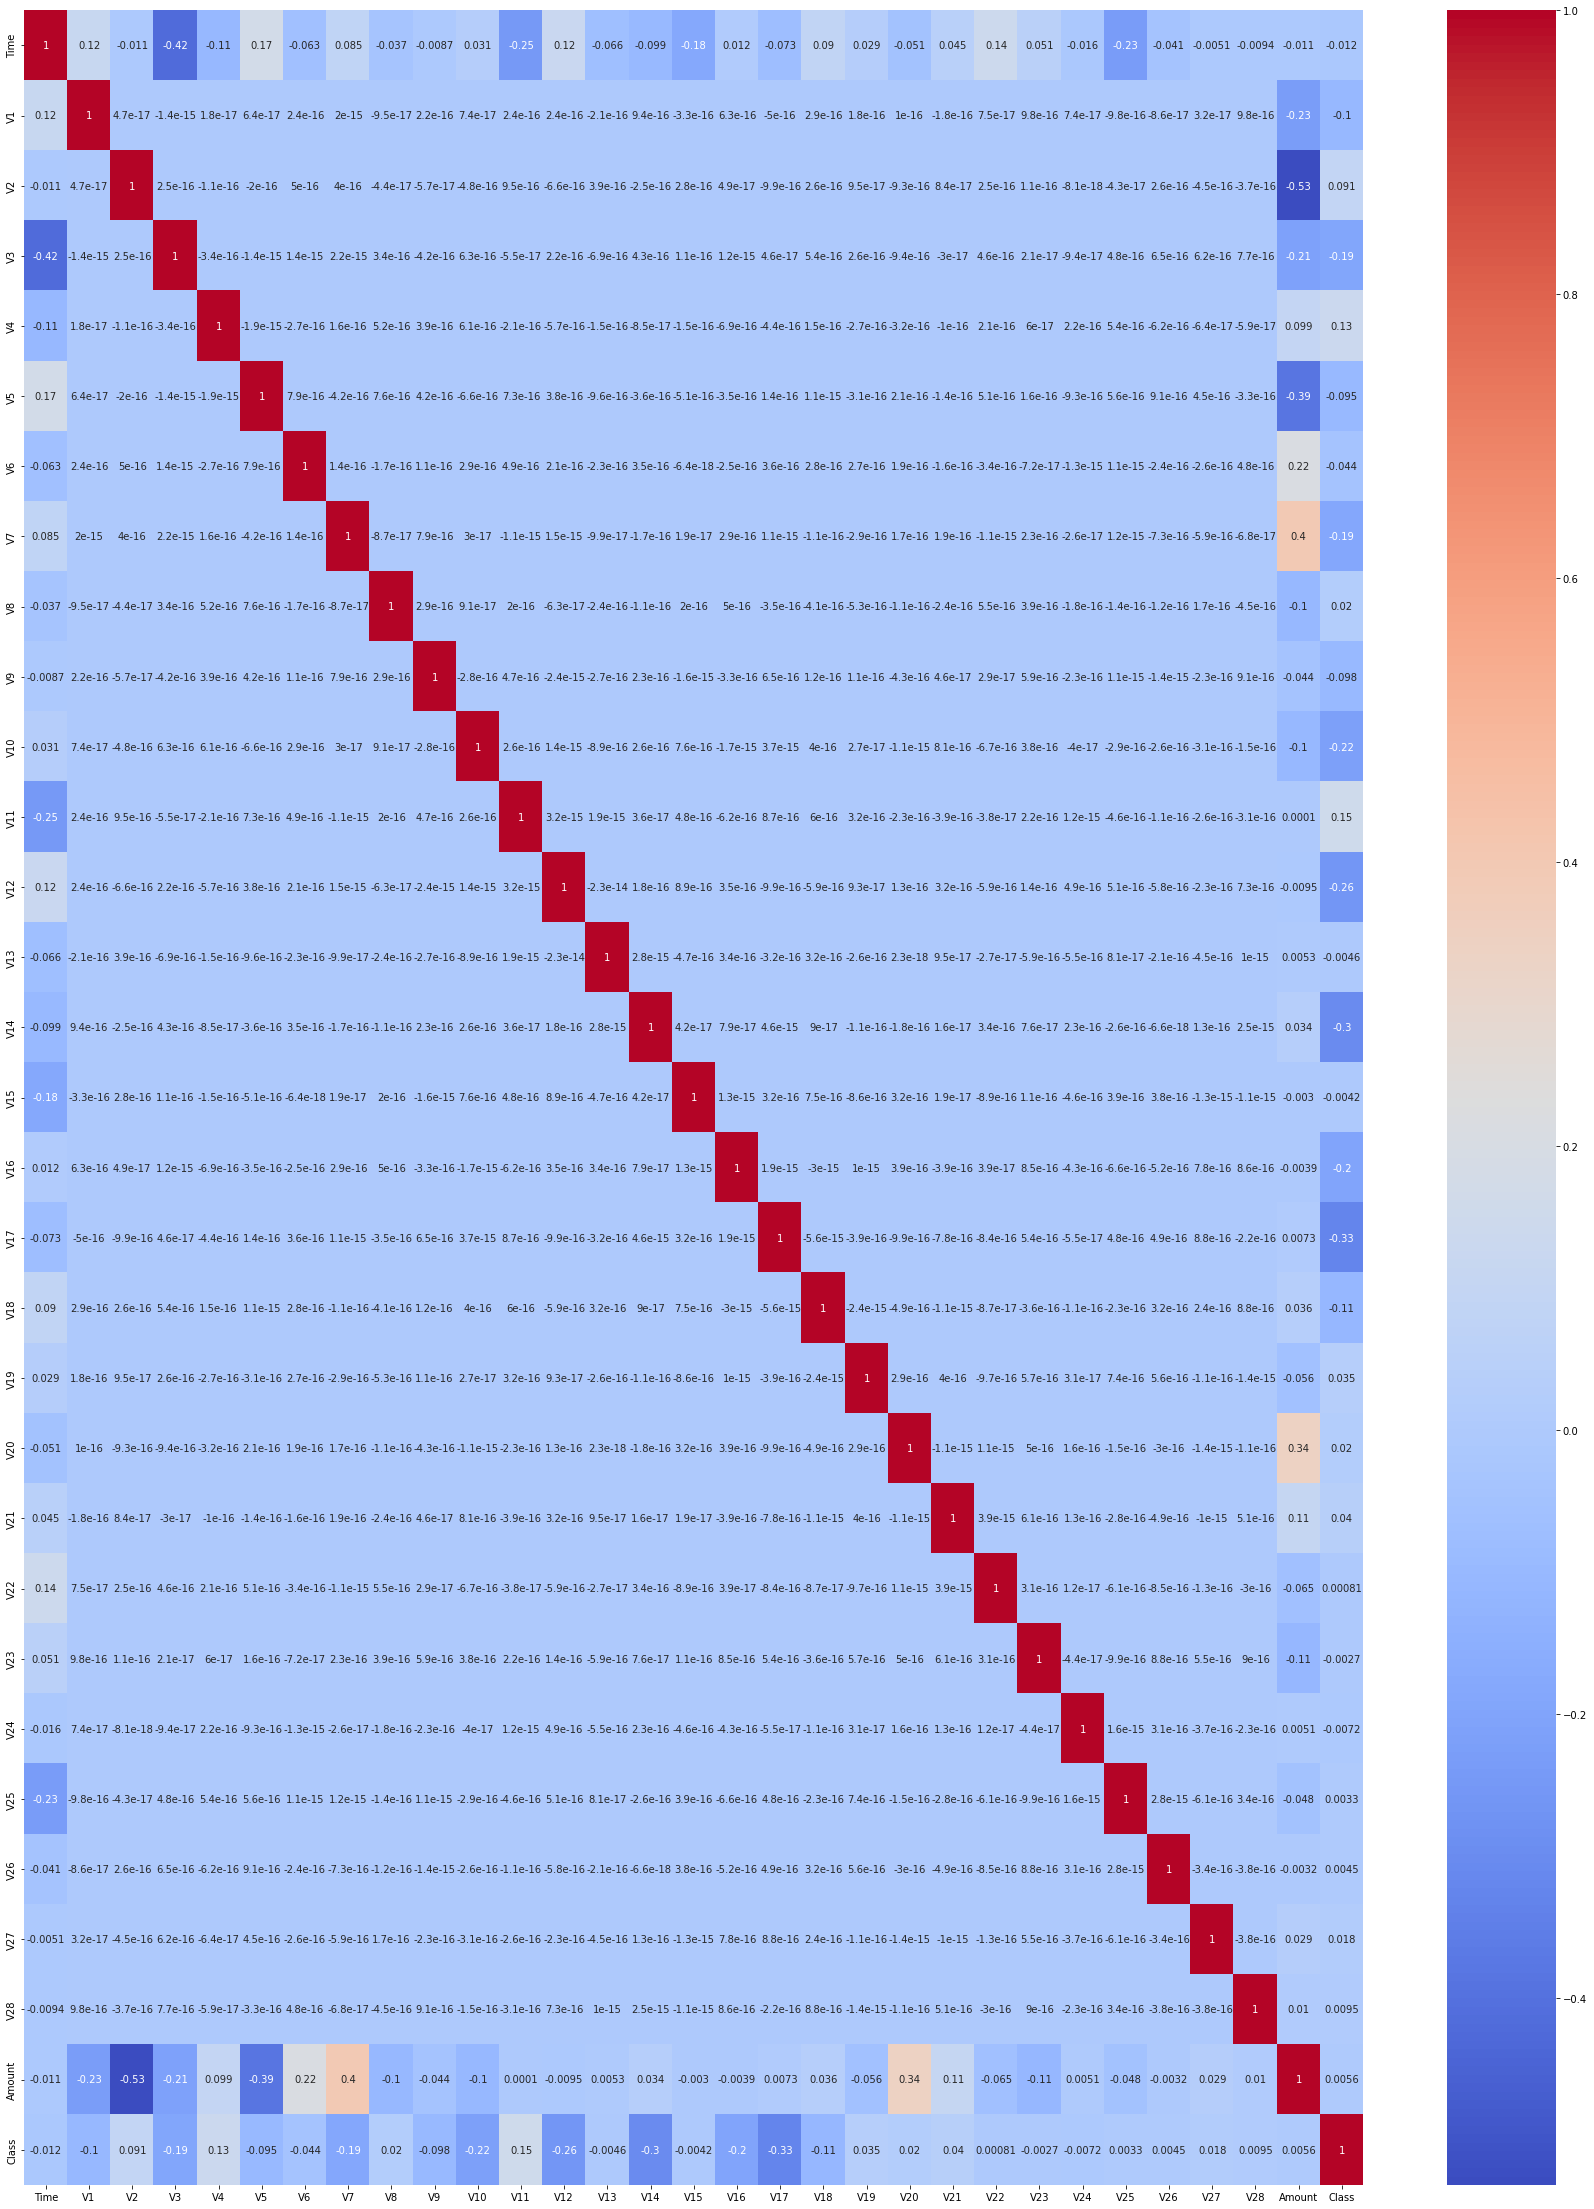

In [ ]:
corr = creditcard.corr()
plt.figure(figsize=(30,40))

sns.heatmap(corr, cmap="coolwarm", annot=True)
plt.show()

In [ ]:
authentic_count ,fraud_count  = creditcard.Class.value_counts()
print(authentic_count ,fraud_count)

284315 492


###Stratify Splitting for Training and Testing

In [ ]:
X = creditcard.drop(['Class'], axis='columns')
y = creditcard['Class']

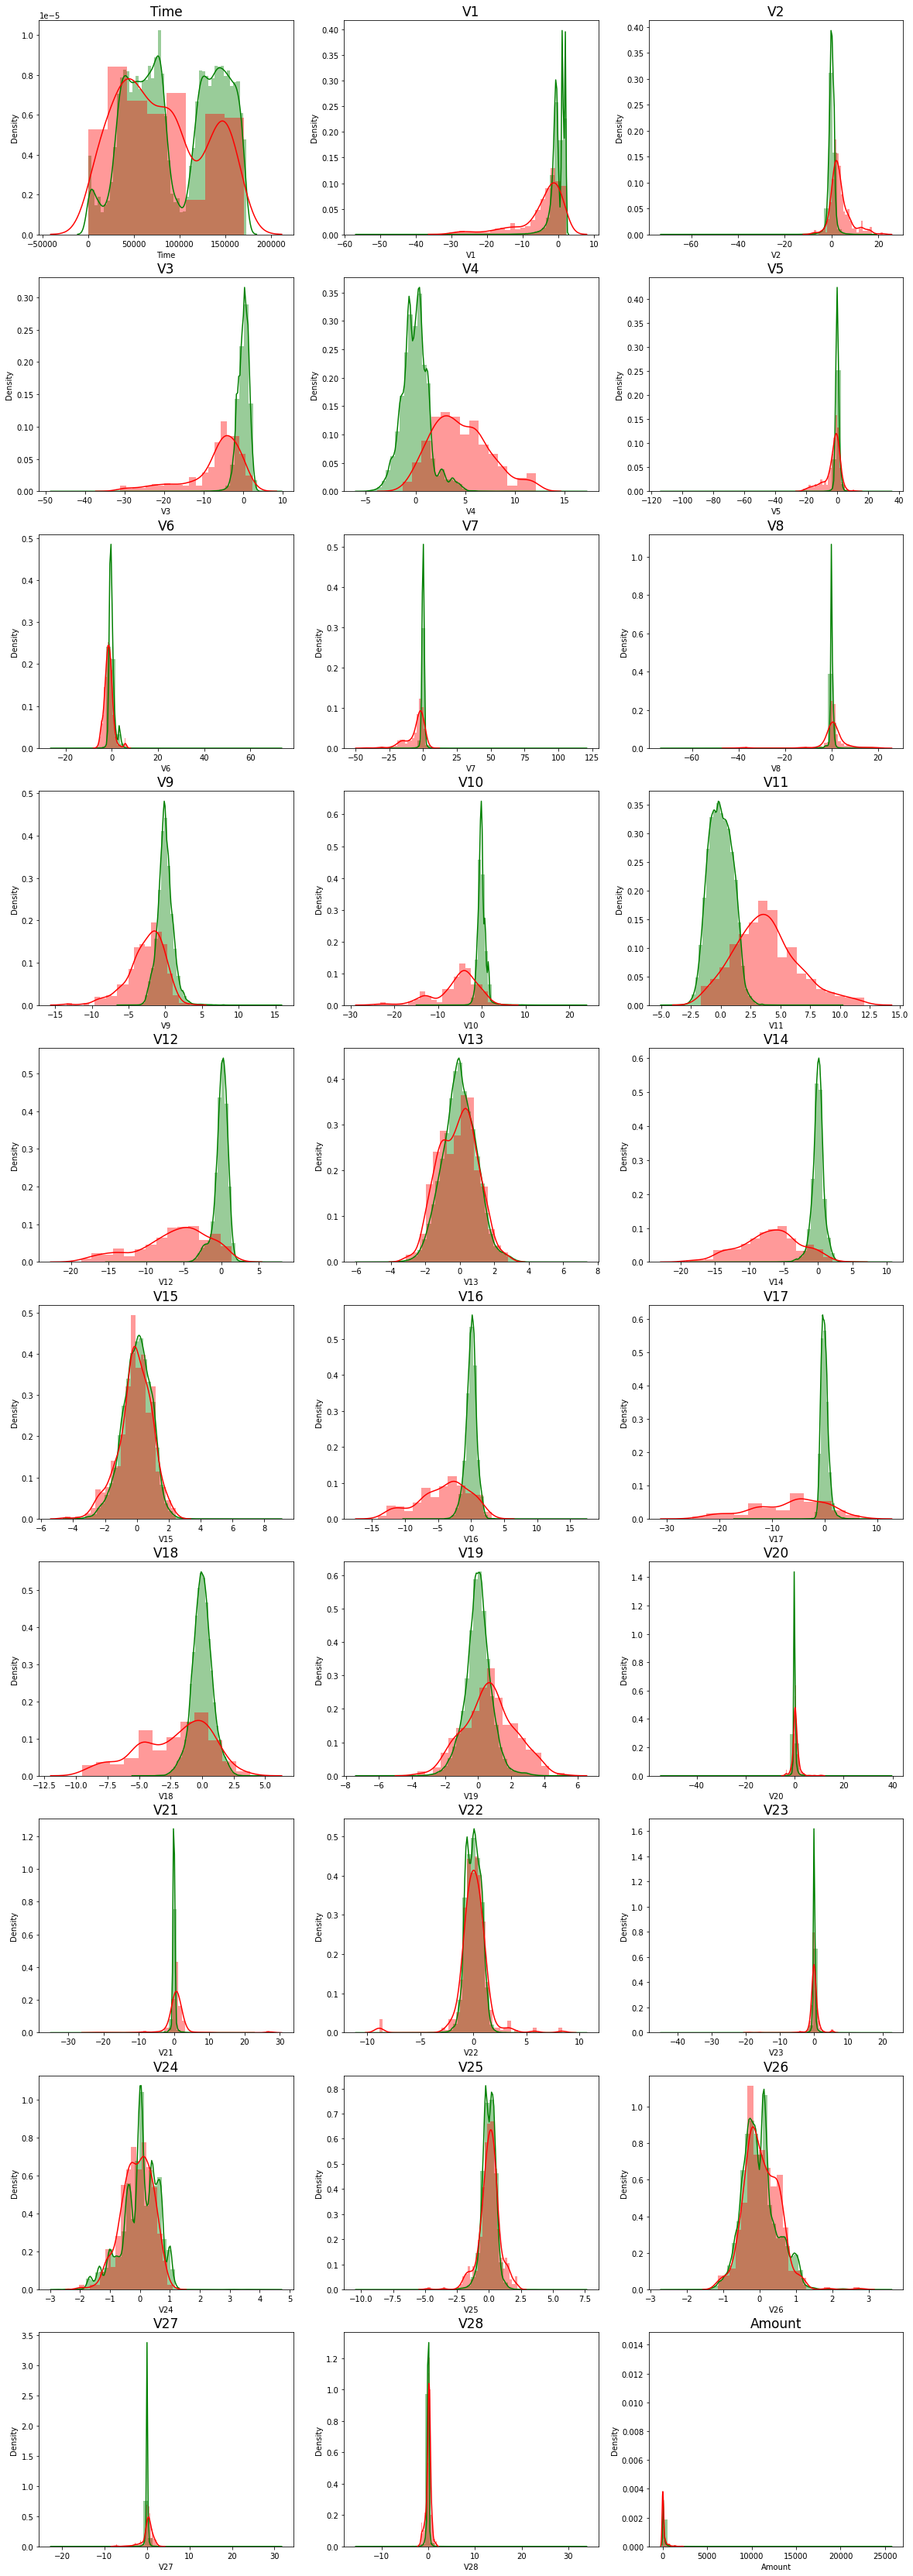

In [ ]:
cols = list(X.columns.values)

normal_records = creditcard.Class == 0
fraud_records = creditcard.Class == 1

plt.figure(figsize=(20, 60))
for n, col in enumerate(cols):
  plt.subplot(10,3,n+1)
  sns.distplot(X[col][normal_records], color='green')
  sns.distplot(X[col][fraud_records], color='red')
  plt.title(col, fontsize=17)
plt.show()

# <a name="p3">**Over Sampling using SMOTE**</a>

In [ ]:
smote = SMOTE(sampling_strategy='minority')
X_sm, y_sm = smote.fit_resample(X, y)

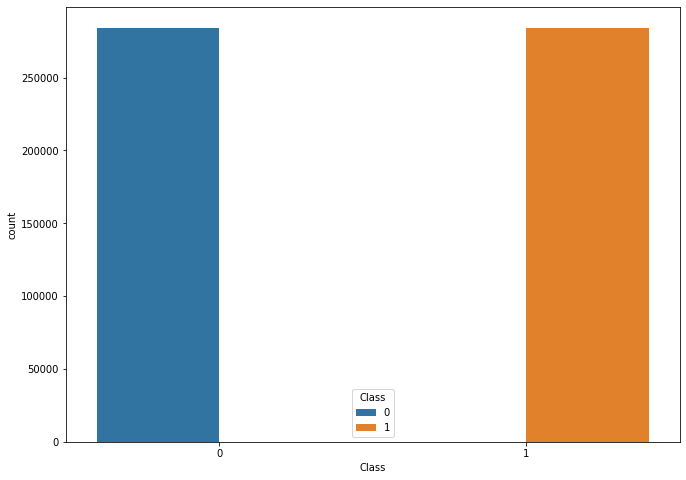

In [ ]:
plt.figure(figsize=(11,8))
sns.countplot(y_sm, hue = y_sm)

## <a name="p3-1">Stratify Splitting for Training and Testing</a>

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.2, random_state=15, stratify=y_sm)

In [ ]:
y_test.value_counts()

1    56863
0    56863
Name: Class, dtype: int64

In [ ]:
y_train.value_counts()

1    227452
0    227452
Name: Class, dtype: int64

## <a name="p3-2">Logistic Regression</a>

In [ ]:
mod = LogisticRegression()

In [ ]:
mod.fit(X_train, y_train)

LogisticRegression()

In [ ]:
y_pred = mod.predict(X_test)

In [ ]:
print(metrics.classification_report(y_test, y_pred))
print("F1 Score:",metrics.f1_score(y_test, y_pred))
print("ROC_AUC Score:",metrics.roc_auc_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.98      0.97     56863
           1       0.98      0.96      0.97     56863

    accuracy                           0.97    113726
   macro avg       0.97      0.97      0.97    113726
weighted avg       0.97      0.97      0.97    113726

F1 Score: 0.9736582942215046
ROC_AUC Score: 0.9738933928916871


## <a name="p3-3">Random Forest</a>

In [ ]:
model2 = RandomForestClassifier(max_depth = 16)

In [ ]:
model2.fit(X_train, y_train)

RandomForestClassifier(max_depth=16)

In [ ]:
y_predrf = model2.predict(X_test)

In [ ]:
print(metrics.classification_report(y_test, y_predrf))
print("F1 Score:",metrics.f1_score(y_test, y_predrf))
print("ROC_AUC Score:",metrics.roc_auc_score(y_test, y_predrf))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       1.00      1.00      1.00     56863

    accuracy                           1.00    113726
   macro avg       1.00      1.00      1.00    113726
weighted avg       1.00      1.00      1.00    113726

F1 Score: 0.999569151227919
ROC_AUC Score: 0.9995691398624764


## <a name="p3-4">K-Nearest Neighbour</a>

In [ ]:
knn = KNeighborsClassifier(n_neighbors = 5,n_jobs=16)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_jobs=16)

In [ ]:
y_predknn = knn.predict(X_test)

In [ ]:
print(metrics.classification_report(y_test, y_predknn))
print("F1 Score:",metrics.f1_score(y_test, y_predknn))
print("ROC_AUC Score:",metrics.roc_auc_score(y_test, y_predknn))

              precision    recall  f1-score   support

           0       0.87      1.00      0.93        99
           1       1.00      0.85      0.92        98

    accuracy                           0.92       197
   macro avg       0.93      0.92      0.92       197
weighted avg       0.93      0.92      0.92       197

F1 Score: 0.9171270718232044
ROC_AUC Score: 0.9234693877551021


#<a name="p4">**Under Sampling**</a>

In [ ]:
nm = NearMiss()

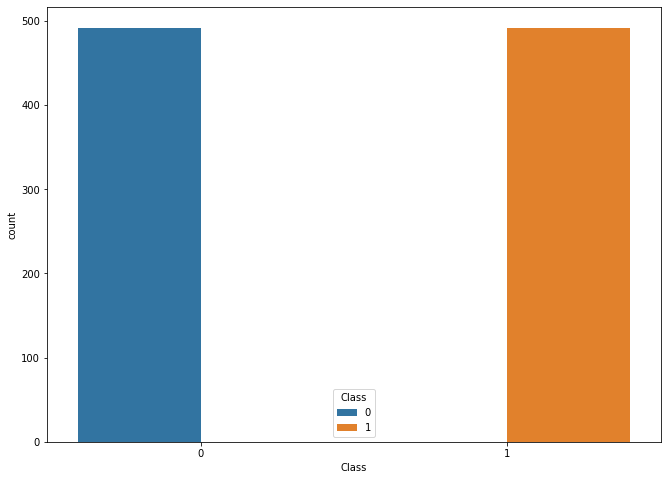

In [ ]:
X_us, y_us = nm.fit_resample(X, y)

plt.figure(figsize=(11,8))
sns.countplot(y_us, hue = y_us)

## <a name="p4-1">Stratify Splitting for Training and Testing</a>

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_us, y_us, test_size=0.2, random_state=15, stratify=y_us)

In [ ]:
y_test.value_counts()

0    99
1    98
Name: Class, dtype: int64

In [ ]:
y_train.value_counts()

1    394
0    393
Name: Class, dtype: int64

## <a name="p4-2">Logistic Regression</a>

In [ ]:
lr2 = LogisticRegression()
lr2.fit(X_train, y_train)

LogisticRegression()

In [ ]:
y_pred2 = mod.predict(X_test)

In [ ]:
print(metrics.classification_report(y_test, y_pred2))
print("F1 Score:",metrics.f1_score(y_test, y_pred2))
print("ROC_AUC Score:",metrics.roc_auc_score(y_test, y_pred2))

## <a name="p4-3">Random Forest</a>

In [ ]:
rf2 = RandomForestClassifier(max_depth = 16)
rf2.fit(X_train, y_train)

In [ ]:
y_predrf2 = rf2.predict(X_test)

In [ ]:
print(metrics.classification_report(y_test, y_predrf2))
print("F1 Score:",metrics.f1_score(y_test, y_predrf2))
print("ROC_AUC Score:",metrics.roc_auc_score(y_test, y_predrf2))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97        99
           1       0.99      0.95      0.97        98

    accuracy                           0.97       197
   macro avg       0.97      0.97      0.97       197
weighted avg       0.97      0.97      0.97       197

F1 Score: 0.96875
ROC_AUC Score: 0.9694392908678624


## <a name="p4-4">K-Nearest Neighbour</a>

In [ ]:
knn2 = KNeighborsClassifier(n_neighbors = 5,n_jobs=16)
knn2.fit(X_train, y_train)

KNeighborsClassifier(n_jobs=16)

In [ ]:
y_predknn2 = knn2.predict(X_test)

In [ ]:
print(metrics.classification_report(y_test, y_predknn2))
print("F1 Score:",metrics.f1_score(y_test, y_predknn2))
print("ROC_AUC Score:",metrics.roc_auc_score(y_test, y_predknn2))

              precision    recall  f1-score   support

           0       0.87      1.00      0.93        99
           1       1.00      0.85      0.92        98

    accuracy                           0.92       197
   macro avg       0.93      0.92      0.92       197
weighted avg       0.93      0.92      0.92       197

F1 Score: 0.9171270718232044
ROC_AUC Score: 0.9234693877551021
